In [1]:
#!pip install stackstac && pip install pystac_client && pip install geogif
#!pip install numpy && pip install matplotlib
#!pip install python-dotenv
import pystac_client
import geogif
import stackstac
import os
import numpy as np
import matplotlib.pyplot as plt
import os
from dotenv import load_dotenv
import glob

In [2]:
load_dotenv()

os.environ['AWS_ACCESS_KEY_ID'] = os.getenv('AWS_ACCESS_KEY_ID')
os.environ['AWS_SECRET_ACCESS_KEY'] = os.getenv('AWS_SECRET_ACCESS_KEY')

# Other variables
os.environ['GDAL_HTTP_TCP_KEEPALIVE'] = "YES"
os.environ['AWS_S3_ENDPOINT'] = "eodata.dataspace.copernicus.eu"
os.environ['AWS_HTTPS'] = "YES"
os.environ['AWS_VIRTUAL_HOSTING'] = "FALSE"
os.environ["GDAL_HTTP_UNSAFESSL"] = "YES"

In [3]:
URL = "https://stac.dataspace.copernicus.eu/v1"
cat = pystac_client.Client.open(URL)
cat.add_conforms_to("ITEM_SEARCH")

In [4]:
geom = {
    "type": "Polygon",
    "coordinates": [
        [
            [19.85, 50.00],
            [20.10, 50.00],
            [20.10, 50.15],
            [19.85, 50.15],
            [19.85, 50.00],
        ]
    ],
}

In [16]:
## for l2a
# params = {
#     "max_items": 100,
#     "collections": "sentinel-2-l2a",
#     "datetime": "2025-05-01/2025-05-08",
#     "intersects": geom,
#     "query": {"eo:cloud_cover": {"lte": 80}},
#     "sortby": "properties.eo:cloud_cover",
#     "fields": {"exclude": ["geometry"]},
# }
#for l1c
# params = {
#     "max_items": 100,
#     "collections": "sentinel-2-l1c",
#     "datetime": "2025-05-01/2025-05-13",
#     "intersects": geom,
#     "query": {"eo:cloud_cover": {"lte": 80}},
#     "sortby": "properties.eo:cloud_cover",
#     "fields": {"exclude": ["geometry"]},
# }

params = {
    "max_items": 100,
    "collections": "sentinel-2-l1c",
    "datetime": "2025-05-01/2025-05-02",
    "intersects": geom,
    "query": {"eo:cloud_cover": {"lte": 80}},
    "sortby": "properties.eo:cloud_cover",
    "fields": {"exclude": ["geometry"]},
}

In [20]:
items = list(cat.search(**params).items_as_dicts())
print(f"Found {len(items)} items.")

items[0]

Found 1 items.


{'id': 'S2B_MSIL1C_20250501T095029_N0511_R079_T34UDA_20250501T114454',
 'bbox': [19.588086136628576,
  49.55648784343154,
  21.01891686270601,
  50.551560380284776],
 'type': 'Feature',
 'links': [{'rel': 'collection',
   'type': 'application/json',
   'href': 'https://stac.dataspace.copernicus.eu/v1/collections/sentinel-2-l1c'},
  {'rel': 'parent',
   'type': 'application/json',
   'href': 'https://stac.dataspace.copernicus.eu/v1/collections/sentinel-2-l1c'},
  {'rel': 'root',
   'type': 'application/json',
   'href': 'https://stac.dataspace.copernicus.eu/v1/'},
  {'rel': 'self',
   'type': 'application/geo+json',
   'href': 'https://stac.dataspace.copernicus.eu/v1/collections/sentinel-2-l1c/items/S2B_MSIL1C_20250501T095029_N0511_R079_T34UDA_20250501T114454'},
  {'rel': 'version-history',
   'href': 'https://trace.dataspace.copernicus.eu/api/v1/traces/name/S2B_MSIL1C_20250501T095029_N0511_R079_T34UDA_20250501T114454.SAFE.zip',
   'type': 'application/json',
   'title': 'Product histor

In [32]:
def extract_eodata_safe_paths(stac_items):
    paths = []
    for item in stac_items:
        for asset in item.get('assets', {}).values():
            href = asset.get('href', '')
            if href.startswith('s3://eodata/') and '.SAFE' in href:
                full_path = href.replace('s3://', '/')
                safe_end = full_path.find('.SAFE') + len('.SAFE')
                trimmed_path = full_path[:safe_end]
                paths.append(trimmed_path)
                break  # Only one .SAFE path per item
    return paths

eodata_paths = extract_eodata_safe_paths(items)
for path in eodata_paths:
    print(path)

/eodata/Sentinel-2/MSI/L1C/2025/05/01/S2B_MSIL1C_20250501T095029_N0511_R079_T34UDA_20250501T114454.SAFE


In [33]:
for directory_path in eodata_paths:
    print(f"Contents of {directory_path}:")
    
    matching_directories = glob.glob(directory_path)

    for directory in matching_directories:
        for root, dirs, files in os.walk(directory):
            for file in files:
                print(os.path.join(root, file))

Contents of /eodata/Sentinel-2/MSI/L1C/2025/05/01/S2B_MSIL1C_20250501T095029_N0511_R079_T34UDA_20250501T114454.SAFE:
/eodata/Sentinel-2/MSI/L1C/2025/05/01/S2B_MSIL1C_20250501T095029_N0511_R079_T34UDA_20250501T114454.SAFE/INSPIRE.xml
/eodata/Sentinel-2/MSI/L1C/2025/05/01/S2B_MSIL1C_20250501T095029_N0511_R079_T34UDA_20250501T114454.SAFE/MTD_MSIL1C.xml
/eodata/Sentinel-2/MSI/L1C/2025/05/01/S2B_MSIL1C_20250501T095029_N0511_R079_T34UDA_20250501T114454.SAFE/S2B_MSIL1C_20250501T095029_N0511_R079_T34UDA_20250501T114454-ql.jpg
/eodata/Sentinel-2/MSI/L1C/2025/05/01/S2B_MSIL1C_20250501T095029_N0511_R079_T34UDA_20250501T114454.SAFE/manifest.safe
/eodata/Sentinel-2/MSI/L1C/2025/05/01/S2B_MSIL1C_20250501T095029_N0511_R079_T34UDA_20250501T114454.SAFE/DATASTRIP/DS_2BPS_20250501T114454_S20250501T095029/MTD_DS.xml
/eodata/Sentinel-2/MSI/L1C/2025/05/01/S2B_MSIL1C_20250501T095029_N0511_R079_T34UDA_20250501T114454.SAFE/DATASTRIP/DS_2BPS_20250501T114454_S20250501T095029/QI_DATA/FORMAT_CORRECTNESS.xml
/eodat

ValueError: not enough values to unpack (expected 5, got 0)

In [21]:
stack = stackstac.stack(
    items=items,
    resolution=(10, 10),
    bounds_latlon=(19.85, 50.00, 20.10, 50.15),
    chunksize=98304,
    epsg=32634,
    gdal_env=stackstac.DEFAULT_GDAL_ENV.updated(
        {
            "GDAL_NUM_THREADS": -1,
            "GDAL_HTTP_UNSAFESSL": "YES",
            "GDAL_HTTP_TCP_KEEPALIVE": "YES",
            "AWS_VIRTUAL_HOSTING": "FALSE",
            "AWS_HTTPS": "YES",
        }
    ),
)

In [22]:
## for l2a
# rgb = stack.sel(band=["B04_10m", "B03_10m", "B02_10m"])
# B08 = stack.sel(band="B08_10m")
# B04 = stack.sel(band="B04_10m")

##for l1c
rgb = stack.sel(band=["B04", "B03", "B02"])
B08 = stack.sel(band="B08")
B04 = stack.sel(band="B04")

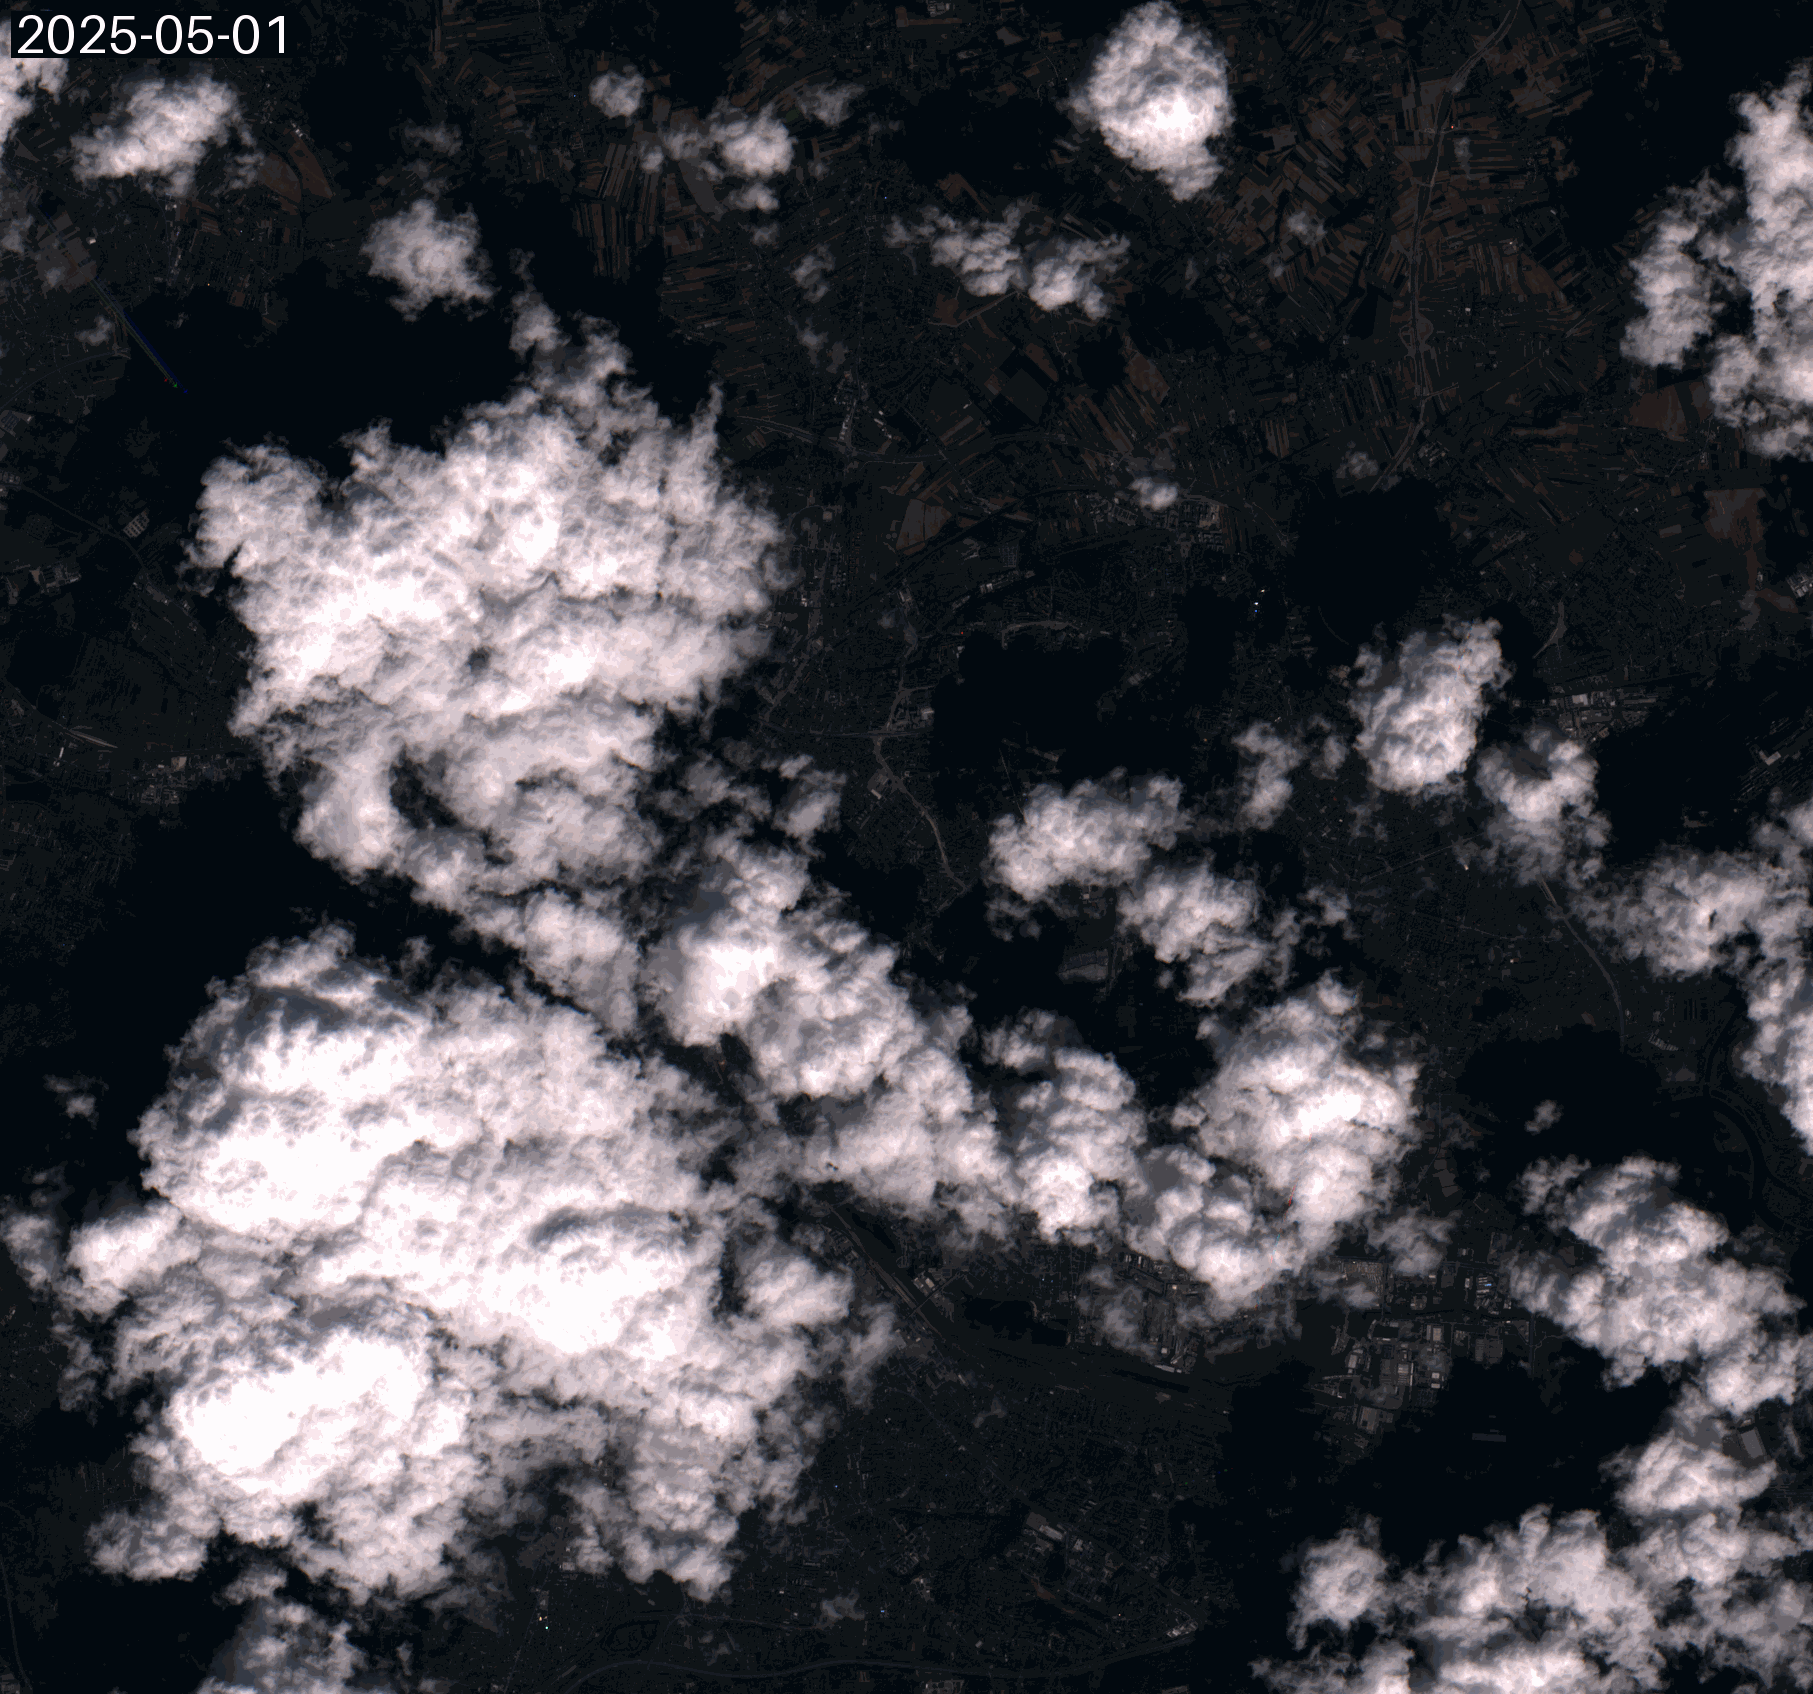

In [23]:
gif = geogif.dgif(rgb, fps=0.5).compute()
gif

In [18]:
cloud_cover_values = [item["properties"]["eo:cloud_cover"] for item in items]
cloud_cover_values

[2.65, 12.19, 19.52]

In [19]:
ndvi = (B08 - B04) / (B08 + B04)
print(ndvi['time'].values)
len(ndvi['time'])

['2024-02-16T09:50:29.024000000' '2024-03-27T09:46:19.025000000'
 '2024-03-29T09:40:31.024000000']


3

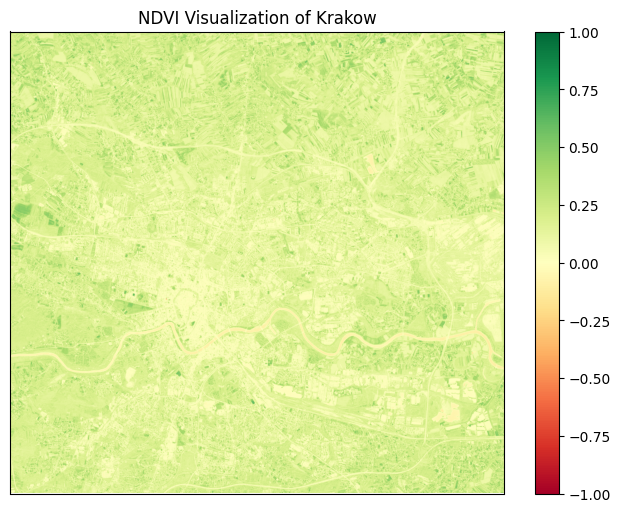

In [20]:
ndvi_single_layer = ndvi.isel(time=0)
plt.figure(figsize=(8, 6))
plt.imshow(ndvi_single_layer, cmap="RdYlGn", vmin=-1, vmax=1)
plt.colorbar()
plt.title("NDVI Visualization of Krakow")
plt.xticks([])
plt.yticks([])
plt.show()

In [ ]:
# Synchronizacja plików z katalogu output_cog z bucketem S3
cog='s3cmd sync /home/eouser/Desktop/wisla/output_ndci/ s3://ndci_w'

os.system(cog)